**Exercise 7.11**. Simulate an MA(1) series with $\theta = −0.6$ and $n = 48$.

**(a)** Find the maximum likelihood estimate of $\theta$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\theta$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.11) on page 161.

**Solution**.

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm_notebook

import warnings

import matplotlib.pyplot as plt
%matplotlib inline

def generate_arima(phi=[], d=0, theta=[], n=100):
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [2]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(theta=[-0.6], n=48), order=(0, 0, 1)).fit(method='mle', disp=-1).maparams[0]

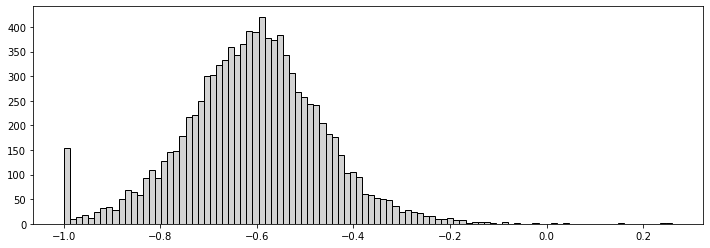

In [3]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [4]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.608
Bootstrap estimate SE:	 0.144
5% percentile:		 -0.851
95% percentile:		 -0.380


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.0133, or a standard error of 0.115.  The bootstrap process produces a sampling distribution that seems to have a bit higher standard error, but have mean results that are still within the original standard error -- results seem unbiased.

**Exercise 7.12**.  Repeat Exercise 7.11 using a sample size of n = 120.

**Solution**.

In [5]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(theta=[-0.6], n=120), order=(0, 0, 1)).fit(method='mle', disp=-1).maparams[0]

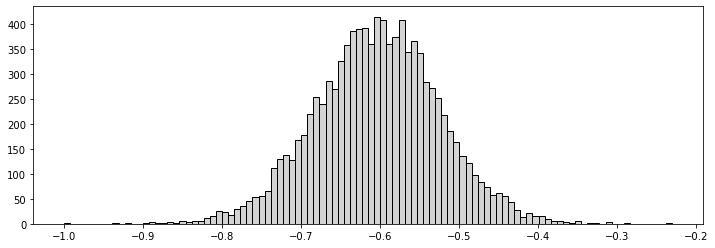

In [6]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [7]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.604
Bootstrap estimate SE:	 0.079
5% percentile:		 -0.733
95% percentile:		 -0.476


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.00533, or a standard error of 0.073.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.13**. Simulate an AR(1) series with $\phi = 0.8$ and $n = 48$.

**(a)** Find the method-of-moments estimate of φ.

**(b)** Find the conditional least squares estimate of φ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of φ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [8]:
from statsmodels.tsa.stattools import acf

def estimate_ar1_mom(x):
    return acf(x, fft=False, nlags=1)[1]

In [9]:
np.random.seed(0)
Y = generate_arima(phi=[0.8], n=48)

**(a)**

In [10]:
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))

Method of moments estimate: 		0.79884


**(b)**

In [11]:
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])

Conditional least squares estimate: 	0.82019


Results are both close to the true value of $\phi = 0.8$, but for this series the method-of-moments method produced a better estimate.

**(c)**

In [12]:
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Maximum likelihood estimate: 		0.80559


Result is still close to the true value of $\phi = 0.8$ -- closer than the CSS method, but the method-of-moments still produced a better estimate.

**(d)**

In [13]:
np.random.seed(1)
Y = generate_arima(phi=[0.8], n=48)
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Method of moments estimate: 		0.49153
Conditional least squares estimate: 	0.55163
Maximum likelihood estimate: 		0.58561


**Exercise 7.14**.  Simulate an AR(1) series with $\phi = −0.5$ and $n = 60$.

**(a)** Find the method-of-moments estimate of $\phi$.

**(b)** Find the conditional least squares estimate of $\phi$ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of $\phi$ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [14]:
np.random.seed(0)
Y = generate_arima(phi=[-0.5], n=60)

**(a)**

In [15]:
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))

Method of moments estimate: 		-0.47478


**(b)**

In [16]:
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])

Conditional least squares estimate: 	-0.47478


The estimate produced by the CSS method appears to be almost identical to the one produced by the method-of-moments method.

**(c)**

In [17]:
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Maximum likelihood estimate: 		-0.48328


The estimate produced by the ML method is closer to the true value than the estimates produced by the other methods.

**(d)**

In [18]:
np.random.seed(100)
Y = generate_arima(phi=[-0.5], n=60)
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Method of moments estimate: 		-0.50269
Conditional least squares estimate: 	-0.50371
Maximum likelihood estimate: 		-0.51714


The method of moments this time appears to provide the better estimate; CSS and ML estimates are worse, though still close.

**Exercise 7.15**.  Simulate an AR(1) series with $\phi = 0.7$ and $n = 100$.

**(a)** Find the maximum likelihood estimate of $\phi$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\phi$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.9) on page 161.

**Solution**.

In [19]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(phi=[0.7], n=100), order=(1, 0, 0)).fit(method='mle', disp=-1).arparams[0]

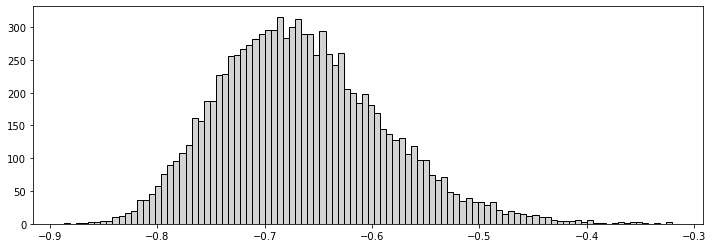

In [20]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [21]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.666
Bootstrap estimate SE:	 0.077
5% percentile:		 -0.780
95% percentile:		 -0.532


The large sample result from Equation (7.4.9) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \phi^2}{n} $$

which is a variance of 0.0051, or a standard error of 0.0714.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.16**.  Simulate an AR(2) series with $\phi_1 = 0.6$, $\phi_2 = 0.3$, and $n = 60$.

**(a)** Find the method-of-moments estimates of $\phi_1$ and $\phi_2$.

**(b)** Find the conditional least squares estimates of $\phi_1$ and $\phi_2$ and compare them with part (a).

**(c)** Find the maximum likelihood estimates of φ1 and φ2 and compare them with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare these results to your results from the first simulation.

**Solution**.

In [22]:
np.random.seed(0)
Y = generate_arima(phi=[0.6, 0.3], n=60)

**(a)**

In [23]:
from statsmodels.regression.linear_model import yule_walker

def estimate_ar2_mom(x):
    rho, sigma = yule_walker(x, order=2)
    return rho

In [24]:
phi1, phi2 = estimate_ar2_mom(Y)

print('Method of moments estimate (phi1): \t\t%.5f' % phi1)
print('Method of moments estimate (phi2): \t\t%.5f' % phi2)

Method of moments estimate (phi1): 		0.64453
Method of moments estimate (phi2): 		0.28471


**(b)**

In [25]:
phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='css').arparams

print('Conditional least squares estimate (phi1): \t%.5f' % phi1)
print('Conditional least squares estimate (phi2): \t%.5f' % phi2)

Conditional least squares estimate (phi1): 	0.64526
Conditional least squares estimate (phi2): 	0.30684


The estimate for $\phi_1$ is almost the same, while the estimate for $\phi_2$ is closer to the true value of 0.3.

**(c)**

In [26]:
phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='mle').arparams

print('Maximum likelihood estimate (phi1): \t\t%.5f' % phi1)
print('Maximum likelihood estimate (phi2): \t\t%.5f' % phi2)

Maximum likelihood estimate (phi1): 		0.63821
Maximum likelihood estimate (phi2): 		0.29124


The estimate for $\phi_1$ is the closest of the 3 methods, while the estimate for $\phi_2$ is close to the true vallue but worse than the CSS estimate.

**(d)**

In [27]:
np.random.seed(1)
Y = generate_arima(phi=[0.6, 0.3], n=60)

phi1, phi2 = estimate_ar2_mom(Y)
print('Method of moments estimate (phi1): \t\t%.5f' % phi1)
print('Method of moments estimate (phi2): \t\t%.5f' % phi2)

phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='css').arparams
print('Conditional least squares estimate (phi1): \t%.5f' % phi1)
print('Conditional least squares estimate (phi2): \t%.5f' % phi2)

phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='mle').arparams
print('Maximum likelihood estimate (phi1): \t\t%.5f' % phi1)
print('Maximum likelihood estimate (phi2): \t\t%.5f' % phi2)

Method of moments estimate (phi1): 		0.37488
Method of moments estimate (phi2): 		0.35973
Conditional least squares estimate (phi1): 	0.40320
Conditional least squares estimate (phi2): 	0.40327
Maximum likelihood estimate (phi1): 		0.40218
Maximum likelihood estimate (phi2): 		0.41149


The estimates seem overall very off in all 3 methods.

**Exercise 7.17**.  Simulate an ARMA(1,1) series with $\phi = 0.7$, $\theta = 0.4$, and $n = 72$.

**(a)** Find the method-of-moments estimates of $\phi$ and $\theta$.

**(b)** Find the conditional least squares estimates of $\phi$ and $\theta$ and compare them with part (a).

**(c)** Find the maximum likelihood estimates of $\phi$ and $\theta$ and compare them with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your new results with your results from the first simulation.

**Solution**.

In [28]:
np.random.seed(0)
Y = generate_arima(phi=[0.7], theta=[0.4], n=72)

**(a)**

In [29]:
def estimate_arma11_mom(x):
    # estimate of phi:  r2 / r1
    # estimate of theta: solve r1 = (1 - theta phi) (phi - theta) / (1 - 2 theta phi + theta^2)
    #    (if it has real roots)
    
    r1, r2 = acf(Y, fft=False, nlags=2)[1:]
    phi = r2 / r1
    delta = (phi**2 - 1)*(phi**2 - 4 *phi *r1 + 4*r1**2 - 1)
    if delta < 0:
        # Complex roots, no MOM estimate for theta
        theta = np.nan
    else:
        theta = ((phi**2 - 2 * phi * r1 + 1) - np.sqrt(delta)) / (2 * (phi - r1))
    return phi, theta

In [30]:
phi, theta = estimate_arma11_mom(Y)

print('Method of moments estimate (phi): \t\t%.5f' % phi)
print('Method of moments estimate (theta): \t\t%.5f' % theta)

Method of moments estimate (phi): 		0.83994
Method of moments estimate (theta): 		0.48077


**(b)**

In [31]:
res = ARIMA(Y, order=(1, 0, 1)).fit(method='css')
phi, theta = res.arparams[0], res.maparams[0]

print('Conditional least squares estimate (phi): \t%.5f' % phi)
print('Conditional least squares estimate (theta): \t%.5f' % theta)

Conditional least squares estimate (phi): 	0.96856
Conditional least squares estimate (theta): 	-1.00000


For this particular series, the method of moments provided much better estimates than CSS, which seem very off.

**(c)**

In [32]:
res = ARIMA(Y, order=(1, 0, 1)).fit(method='mle')
phi, theta = res.arparams[0], res.maparams[0]

print('Conditional least squares estimate (phi): \t%.5f' % phi)
print('Conditional least squares estimate (theta): \t%.5f' % theta)

Conditional least squares estimate (phi): 	0.86969
Conditional least squares estimate (theta): 	-0.53178


MLE also provided very poor estimates in this scenario for $\theta$, though the estimate for $\phi$ is similar to the estimate obtained by the method of moments.

**(d)**

In [33]:
np.random.seed(1)
Y = generate_arima(phi=[0.7], theta=[0.4], n=72)

phi, theta = estimate_arma11_mom(Y)
print('Method of moments estimate (phi): \t\t%.5f' % phi)
print('Method of moments estimate (theta): \t\t%.5f' % theta)

res = ARIMA(Y, order=(1, 0, 1)).fit(method='css')
phi, theta = res.arparams[0], res.maparams[0]
print('Conditional least squares estimate (phi): \t%.5f' % phi)
print('Conditional least squares estimate (theta): \t%.5f' % theta)

res = ARIMA(Y, order=(1, 0, 1)).fit(method='mle')
phi, theta = res.arparams[0], res.maparams[0]
print('Conditional least squares estimate (phi): \t%.5f' % phi)
print('Conditional least squares estimate (theta): \t%.5f' % theta)

Method of moments estimate (phi): 		0.84827
Method of moments estimate (theta): 		0.65714
Conditional least squares estimate (phi): 	0.42877
Conditional least squares estimate (theta): 	-0.16134
Conditional least squares estimate (phi): 	0.57390
Conditional least squares estimate (theta): 	-0.31879


The estimates for $\theta$ are all over the place, but the ones for the method of moments seem better.  Estimates for $\phi$ are also very noisy, but somewhat better.

**Exercise 7.18**.  Simulate an AR(1) series with $\phi = 0.6$, $n = 36$ but with error terms from a t-distribution with 3 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(1) model suggested?

**(b)** Estimate $\phi$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [34]:
def generate_arima(phi=[], d=0, theta=[], n=100, distrvs=None):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters,
    using the optimally provided random function generator.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n, distrvs=distrvs)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [35]:
from scipy.stats import t

def rt(df):
    """ 
    Returns a function that generates random variables from a t-distribution
    with df degrees of freedom, with signature compatible with the argument
    distrvs in ArmaProcess.generate_sample.
    """
    
    def f(size=None):
        return t.rvs(df, size=size)
    
    return f

In [36]:
from statsmodels.tsa.stattools import acf, pacf

def plot_acf_with_bounds(acf, lower, upper, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.fill_between(k, lower, upper, color='C0', alpha=0.2)

    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')    
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()

In [37]:
np.random.seed(1000)
Y = generate_arima(phi=[0.6], n=36, distrvs=rt(3))

**(a)**

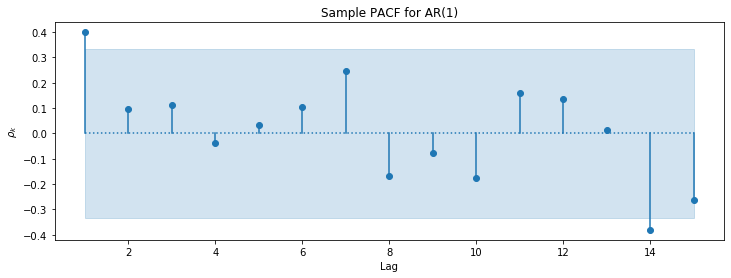

In [38]:
r = pacf(Y, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample PACF for AR(1)')

Yes -- PACF suggests an AR(1) process, though the lag at $k=14$ may need investigation.

**(b)**

In [39]:
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Method of moments estimate: 		0.38835
Maximum likelihood estimate: 		0.39221


Both estimates from method of moments and maximum likelihood are a bit off from the true value.

**(c)**

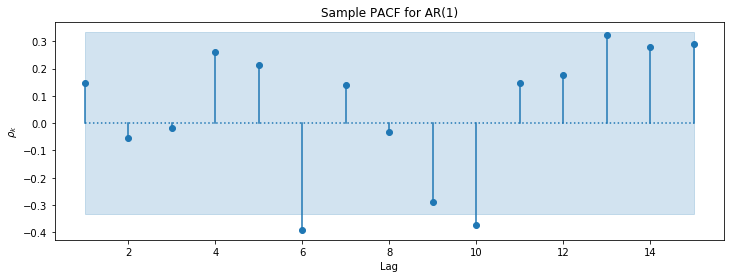

Method of moments estimate: 		0.14268
Maximum likelihood estimate: 		0.14235


In [40]:
np.random.seed(1001)
Y = generate_arima(phi=[0.6], n=36, distrvs=rt(3))

r = pacf(Y, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample PACF for AR(1)')

print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

PACF now suggests a white noise process (with potential lags to investigate at 6 and 10), while method of moment and maximum lileihood estimates are a bit off at $\phi = 0.143$, $\phi=0.142$.

**Exercise 7.19**.  Simulate an MA(1) series with $\theta = −0.8$, $n = 60$ but with error terms from a t-distribution with 4 degrees of freedom.

**(a)** Display the sample ACF of the series. Is an MA(1) model suggested?

**(b)** Estimate θ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [41]:
np.random.seed(5000)
Y = generate_arima(theta=[-0.8], n=60, distrvs=rt(4))

**(a)**

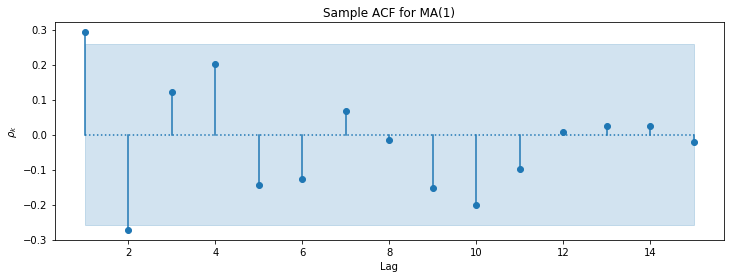

In [42]:
r = acf(Y, fft=False, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample ACF for MA(1)')

ACF suggests an MA(2) process, rather than the actual MA(1) process.

**(b)**

In [43]:
def estimate_ma1_mom(x):
    r = acf(x, fft=False, nlags=1)[1]
    if np.abs(r) < 0.5:
        return (-1 + np.sqrt(1 - 4 * r**2))/(2*r)
    return np.nan

In [44]:
print('Method of moments estimate: \t\t%.5f' % estimate_ma1_mom(Y))
print('Maximum likelihood estimate: \t\t%.5f' % -ARIMA(Y, order=(0, 0, 1)).fit(method='mle').maparams[0])

Method of moments estimate: 		-0.32257
Maximum likelihood estimate: 		-0.89825


Both estimates seem to be off, with the method of moments estimate at $\theta = -0.322$ and the maximum likelihood estimate with $\theta = -0.898$.

**(c)**

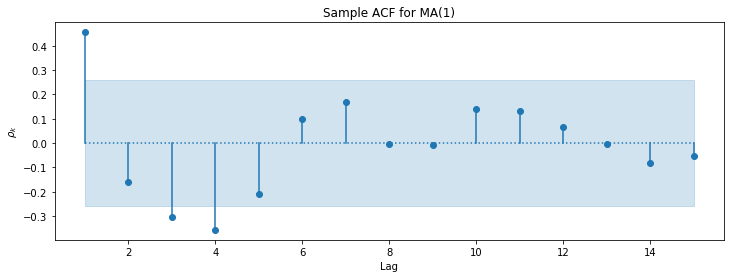

Method of moments estimate: 		-0.64415
Maximum likelihood estimate: 		-0.78173


In [45]:
np.random.seed(5001)
Y = generate_arima(theta=[-0.8], n=60, distrvs=rt(4))

r = acf(Y, fft=False, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample ACF for MA(1)')

print('Method of moments estimate: \t\t%.5f' % estimate_ma1_mom(Y))
print('Maximum likelihood estimate: \t\t%.5f' % -ARIMA(Y, order=(0, 0, 1)).fit(method='mle').maparams[0])

This time the ACF is less clear cut; it suggests MA(1) but the lags at 3, 4 may need to be investigated.

Method of moment estimates and maximum likelihood estimates for $\theta$ are closer to the true value, at $\theta = -0.644$ and $\theta = -0.782$.

**Exercise 7.20**. Simulate an AR(2) series with $\phi_1 = 1.0$, $\phi_2 = −0.6$, $n = 48$ but with error terms from a t-distribution with 5 degrees of freedom.

**(a)** Display the sample PACF of the series. Is an AR(2) model suggested?

**(b)** Estimate $\phi_1$ and $\phi_2$ from the series and comment on the results.

**(c)** Repeat parts (a) and (b) with a new simulated series under the same conditions.

**Solution**.

In [46]:
np.random.seed(5000)
Y = generate_arima(phi=[1, -0.6], n=48, distrvs=rt(5))

**(a)**

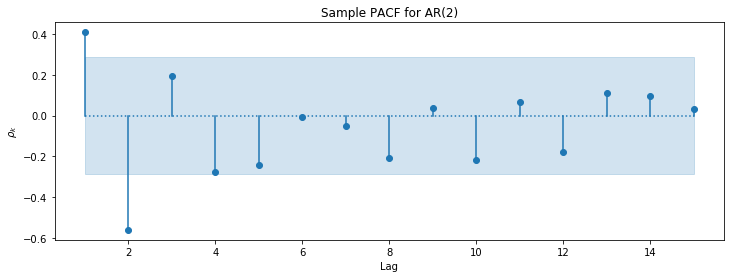

In [47]:
r = pacf(Y, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample PACF for AR(2)')

Yes, the PACF suggests an AR(2) model.

**(b)**

In [48]:
phi1, phi2 = estimate_ar2_mom(Y)
print('Method of moments estimate (phi1): \t\t%.5f' % phi1)
print('Method of moments estimate (phi2): \t\t%.5f' % phi2)

phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='mle').arparams
print('Maximum likelihood estimate (phi1): \t\t%.5f' % phi1)
print('Maximum likelihood estimate (phi2): \t\t%.5f' % phi2)

Method of moments estimate (phi1): 		0.64004
Method of moments estimate (phi2): 		-0.56157
Maximum likelihood estimate (phi1): 		0.69446
Maximum likelihood estimate (phi2): 		-0.60242


Both estimates for $\phi_1$ are a bit off, while the estimates for $\phi_2$ are closer to the true value.

**(c)**

In [49]:
np.random.seed(5001)
Y = generate_arima(phi=[1, -0.6], n=48, distrvs=rt(5))

c:\programdata\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


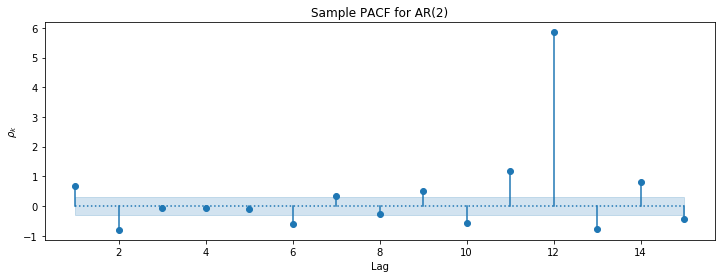

Method of moments estimate (phi1): 		1.23578
Method of moments estimate (phi2): 		-0.80324
Maximum likelihood estimate (phi1): 		1.15184
Maximum likelihood estimate (phi2): 		-0.72105


In [50]:
r = pacf(Y, nlags=15)[1:]
se = 1 / np.sqrt(len(Y))
plot_acf_with_bounds(r, -2*se, 2*se, title='Sample PACF for AR(2)')

phi1, phi2 = estimate_ar2_mom(Y)
print('Method of moments estimate (phi1): \t\t%.5f' % phi1)
print('Method of moments estimate (phi2): \t\t%.5f' % phi2)

phi1, phi2 = ARIMA(Y, order=(2, 0, 0)).fit(method='mle').arparams
print('Maximum likelihood estimate (phi1): \t\t%.5f' % phi1)
print('Maximum likelihood estimate (phi2): \t\t%.5f' % phi2)

This time, PACF displays multiple invalid lags, with some numerical issues in the computation -- as a result of the not-so-rare fat tails in the t-distribution.

Estimates for $\phi_1, \phi_2$ are a bit off as well, but at least have the right sign and order of magnitude.